<a href="https://colab.research.google.com/github/Aerdor1998/Linguagem_Natural/blob/main/NLPCP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytesseract
!pip install opencv-python
!pip install opencv-python-headless
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!sudo apt-get install -y tesseract-ocr-por



Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
Reading pac

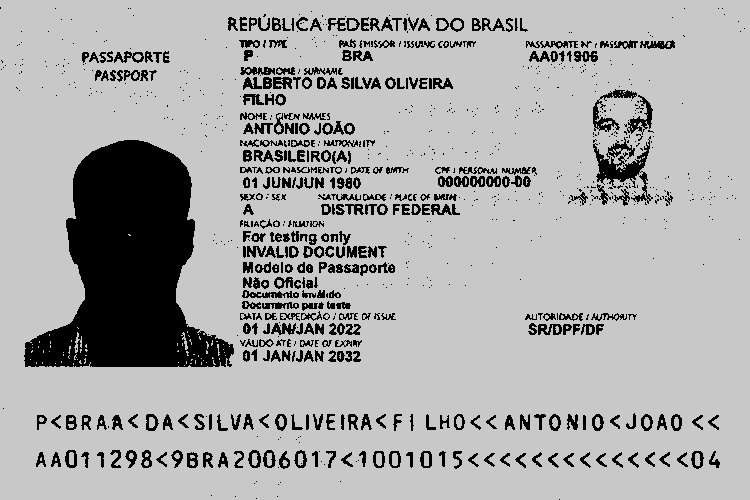

Nome: None
Sobrenome: None
Número do Passaporte: None
Nacionalidade:  .
Data de Nascimento: None
Data de Validade: None
REPÚBLICA!FEDERATIVA DO BRASIL .
MSIE O emma Ns Cm rasante sorria
PASSAPORTE P BRA AADIA906
. pass “ALBERTO DA SILVA OLIVEIRA .
FILHO . EM
Nom que maes :
“5 ANTÔNIO JOAO ns
SNS oe E aa
BRASILEIROÇA) 7
A DONE ot co esc mea
1 JUNHHUN 1980 ToODOMUO DO” * va :
A DISTRITO FEDERAL ça
Pa
oe testing onty
INVALID DOCUMENT
Modelo de Passaporte
Não Qficial
DAS OR cia do
doar puta
BE Deo rss nsromende aero
4 JANHIAN 2022 SRIDPFIDF
vao ae ta
GA IANIJAN 2032
P<BRAA<DA<SILVASOLIVEIRASF | LHO<X<ANTONIO<S JOAO <<
AAQI1298<9BRAZ006017<1001015<<<<<<<<<<<<<<04



In [21]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import re
import json

# Para Windows, defina o caminho do executável do Tesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Em Colab e outros ambientes, o Tesseract geralmente já está instalado e no PATH.

def preprocess_image(image_path):
    # Carrega a imagem
    image = cv2.imread(image_path)

    # Converte a imagem para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binariza a imagem
    _, binary = cv2.threshold(gray, 100, 200, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

def extract_text_from_image(preprocessed_image):
    # Configurações do Tesseract para otimizar a leitura de documentos
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(preprocessed_image, config=custom_config, lang='por')
    return text

def process_extracted_text(text):
    # Expressões regulares para capturar informações específicas
    nome = re.search(r'PASSAPORTE\n([^\n]*)', text)
    sobrenome = re.search(r'PASSAPORTE\n(.*)\n(.*)\n(.*)', text)
    nacionalidade = re.search(r'BRASIL([^\n]*)', text)
    data_nascimento = re.search(r'(\d{2} [A-Z]{3} \d{4})', text)
    data_validade = re.search(r'(0[1-9]|1[0-2])/20[0-9]{2}', text)

    extracted_data = {
        'Nome': None,  # Não consegui encontrar um padrão claro para o nome no texto fornecido
        'Sobrenome': sobrenome.group(1) if sobrenome else None,
        'Número do Passaporte': nome.group(1) if nome else None,
        'Nacionalidade': nacionalidade.group(1) if nacionalidade else None,
        'Data de Nascimento': data_nascimento.group(1) if data_nascimento else None,
        'Data de Validade': data_validade.group(0) if data_validade else None,
    }

    return extracted_data


def output_extracted_data(data):
    # Exibe os dados no console
    for key, value in data.items():
        print(f'{key}: {value}')

    # Salva os dados em um arquivo JSON
    with open('extracted_data.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# Caminho para a imagem do passaporte
image_path = '/content/passaport.webp'

# Processa a imagem e extrai o texto
preprocessed_image = preprocess_image(image_path)

# Exibe a imagem pré-processada
cv2_imshow(preprocessed_image)

# Extrai o texto da imagem pré-processada
text = extract_text_from_image(preprocessed_image)

# Processa o texto extraído para obter os dados específicos
extracted_data = process_extracted_text(text)

# Exibe e salva os dados extraídos
output_extracted_data(extracted_data)

# Imprime o texto extraído
print(text)


In [24]:
from google.colab.patches import cv2_imshow
import pytesseract
import numpy as np

# Carrega a imagem do passaporte
image = cv2.imread('/content/passaport.webp')

# Converte a imagem para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detecta as regiões de texto na imagem usando o detector de texto do OpenCV
config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(gray, config=config, output_type=pytesseract.Output.DICT)

# Itera sobre as regiões de texto detectadas
rois = []
extracted_data = {}
for i, text in enumerate(data['text']):
    if text.strip():
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        roi = gray[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi, config=config)
        rois.append((roi, text))

        # Extrai informações específicas com base nas palavras-chave
        if 'PASSAPORTE' in text:
            nome_sobrenome = text.split('\n')[1]
            if ' ' in nome_sobrenome:
                nome, sobrenome = nome_sobrenome.split(maxsplit=1)
                extracted_data['Nome'] = nome
                extracted_data['Sobrenome'] = sobrenome
        elif 'BRASILEIRO' in text:
            extracted_data['Nacionalidade'] = text.strip()
        elif 'JUNHHUN' in text:
            extracted_data['Data de Nascimento'] = text.split()[-1]
        elif 'VALIDA' in text and 'ATE' in text:
            extracted_data['Data de Validade'] = text.split()[-1]
        elif '<<AA' in text:
            extracted_data['Número do Passaporte'] = text.split('<')[-1]

# Exibe as informações extraídas
for key, value in extracted_data.items():
    print(f'{key}: {value}')

# Opcional: Exibe as regiões de interesse detectadas
for roi, text in rois:
    cv2.imshow('ROI', roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Nacionalidade: BRASILEIRO(A)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Nacionalidade: BRASILEIRO(A)


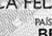

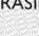

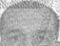

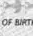

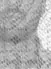

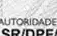

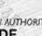

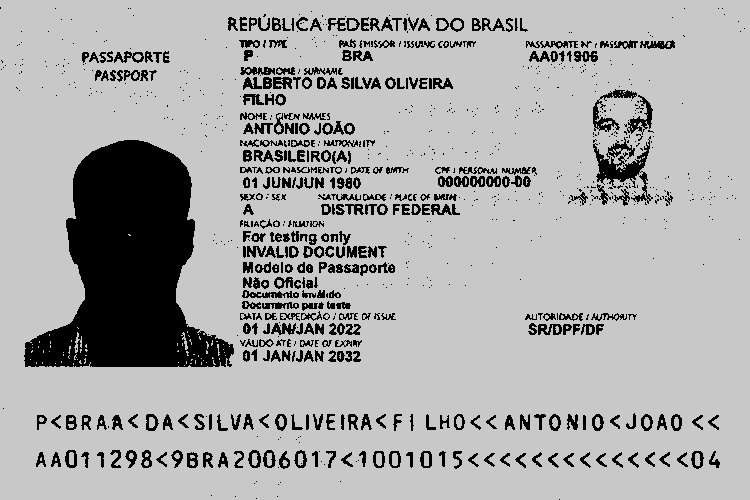

Nome: None
Sobrenome: None
Número do Passaporte: None
Nacionalidade:  .
Data de Nascimento: None
Data de Validade: None
REPÚBLICA!FEDERATIVA DO BRASIL .
MSIE O emma Ns Cm rasante sorria
PASSAPORTE P BRA AADIA906
. pass “ALBERTO DA SILVA OLIVEIRA .
FILHO . EM
Nom que maes :
“5 ANTÔNIO JOAO ns
SNS oe E aa
BRASILEIROÇA) 7
A DONE ot co esc mea
1 JUNHHUN 1980 ToODOMUO DO” * va :
A DISTRITO FEDERAL ça
Pa
oe testing onty
INVALID DOCUMENT
Modelo de Passaporte
Não Qficial
DAS OR cia do
doar puta
BE Deo rss nsromende aero
4 JANHIAN 2022 SRIDPFIDF
vao ae ta
GA IANIJAN 2032
P<BRAA<DA<SILVASOLIVEIRASF | LHO<X<ANTONIO<S JOAO <<
AAQI1298<9BRAZ006017<1001015<<<<<<<<<<<<<<04



In [26]:
from google.colab.patches import cv2_imshow
import pytesseract
import numpy as np

# Carrega a imagem do passaporte
image = cv2.imread('/content/passaport.webp')

# Converte a imagem para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detecta as regiões de texto na imagem usando o detector de texto do OpenCV
config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(gray, config=config, output_type=pytesseract.Output.DICT)

# Itera sobre as regiões de texto detectadas
rois = []
extracted_data = {}
for i, text in enumerate(data['text']):
    if text.strip():
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        roi = gray[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi, config=config)
        rois.append((roi, text))

        # Extrai informações específicas com base nas palavras-chave
        if 'PASSAPORTE' in text:
            nome_sobrenome = text.split('\n')[1]
            if ' ' in nome_sobrenome:
                nome, sobrenome = nome_sobrenome.split(maxsplit=1)
                extracted_data['Nome'] = nome
                extracted_data['Sobrenome'] = sobrenome
        elif 'BRASILEIRO' in text:
            extracted_data['Nacionalidade'] = text.strip()
        elif 'JUNHHUN' in text:
            extracted_data['Data de Nascimento'] = text.split()[-1]
        elif 'VALIDA' in text and 'ATE' in text:
            extracted_data['Data de Validade'] = text.split()[-1]
        elif '<<AA' in text:
            extracted_data['Número do Passaporte'] = text.split('<')[-1]

# Exibe as informações extraídas
for key, value in extracted_data.items():
    print(f'{key}: {value}')

# Opcional: Exibe as regiões de interesse detectadas
for roi, text in rois:
    cv2_imshow(roi)

def output_extracted_data(data):
    # Exibe os dados no console
    for key, value in data.items():
        print(f'{key}: {value}')

    # Salva os dados em um arquivo JSON
    with open('extracted_data.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# Caminho para a imagem do passaporte
image_path = '/content/passaport.webp'

# Processa a imagem e extrai o texto
preprocessed_image = preprocess_image(image_path)

# Exibe a imagem pré-processada
cv2_imshow(preprocessed_image)

# Extrai o texto da imagem pré-processada
text = extract_text_from_image(preprocessed_image)

# Processa o texto extraído para obter os dados específicos
extracted_data = process_extracted_text(text)

# Exibe e salva os dados extraídos
output_extracted_data(extracted_data)

# Imprime o texto extraído
print(text)

